In [1]:
# Importing the libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

#  Since we are predicting the price of houses, this is a regression problem

In [2]:
#Importing the file to be worked on
housing=pd.read_csv('kc_house_data.csv')

In [3]:
#Checking the head to know what we are dealing with
housing.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
#to check if there is missing values in our dataset
housing.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [29]:
housing.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## VISUALISATIONS
Let's see some visualizations before we proceed to ML

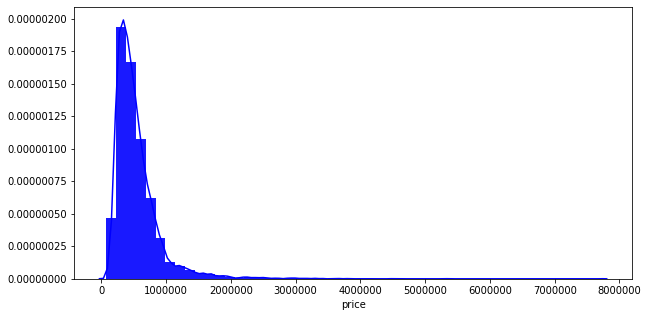

In [6]:
plt.figure(figsize=(10,5))
sns.distplot(housing['price'], kde = True, color = 'b', hist_kws={'alpha': 0.9})

ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.draw()

#This shows the price distribution of houses in Kings County

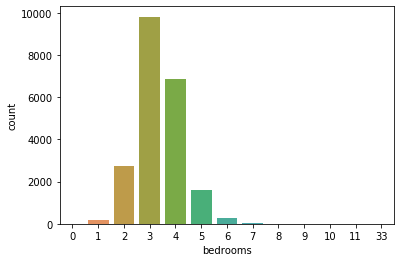

In [7]:
sns.countplot(x='bedrooms',data=housing)
# Most of the houses are having 3 bedrooms, followed by 4 bedrooms

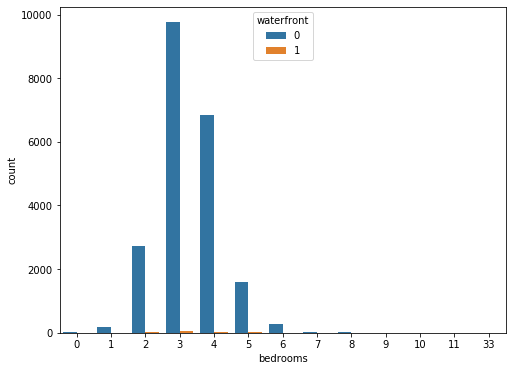

In [8]:
plt.figure(figsize=(8,6))
sns.countplot(x='bedrooms',hue='waterfront', data=housing)
# Most of the houses dont have waterfront

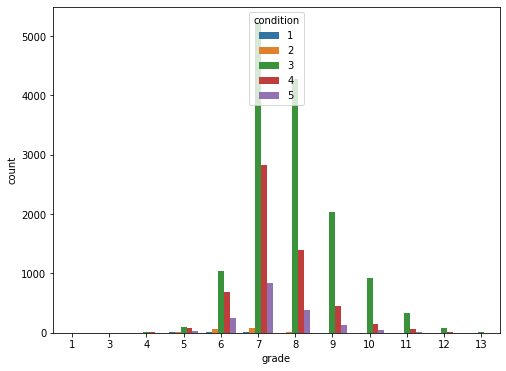

In [9]:
plt.figure(figsize=(8,6))
sns.countplot(x='grade',hue='condition', data=housing)
# Majority of the houses are in average condition

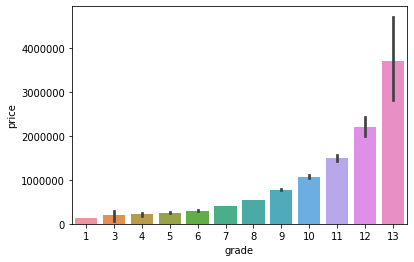

In [10]:
sns.barplot(x='grade', y='price', data=housing)
# The higher the grade of the house you want, the higher the price

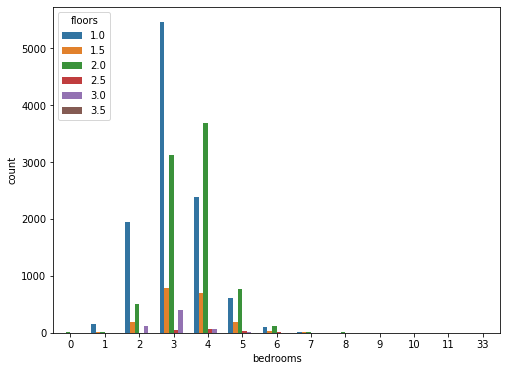

In [11]:
plt.figure(figsize=(8,6))
sns.countplot(x='bedrooms',hue='floors', data=housing)
# 1 and 2 floors houses are the common types we have in the Kings County

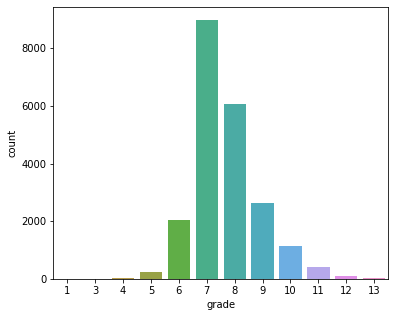

In [12]:
plt.figure(figsize=(6,5))
sns.countplot(x='grade',data=housing)
# Grade 7 houses are rampant then any other.

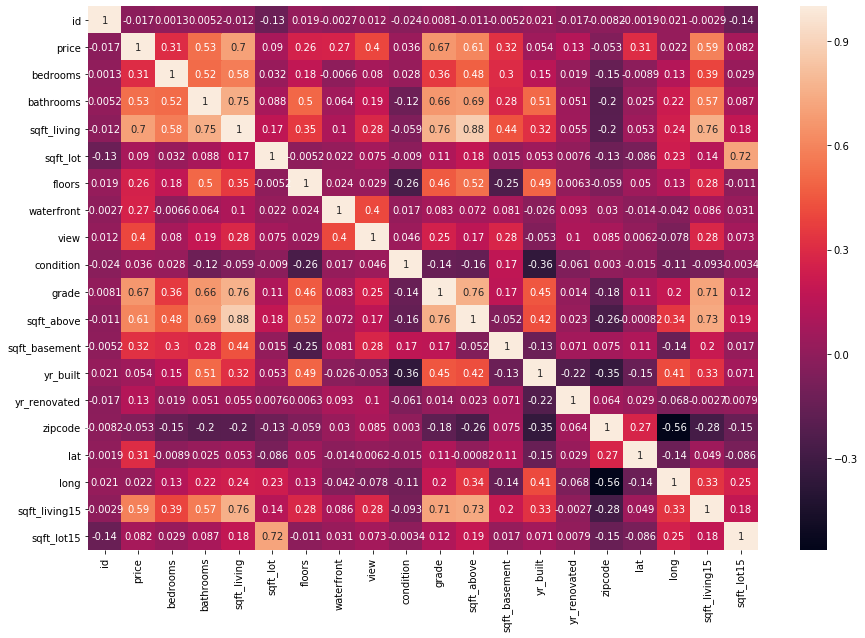

In [13]:
plt.figure(figsize=(15,10))
sns.heatmap(housing.corr(), annot=True)

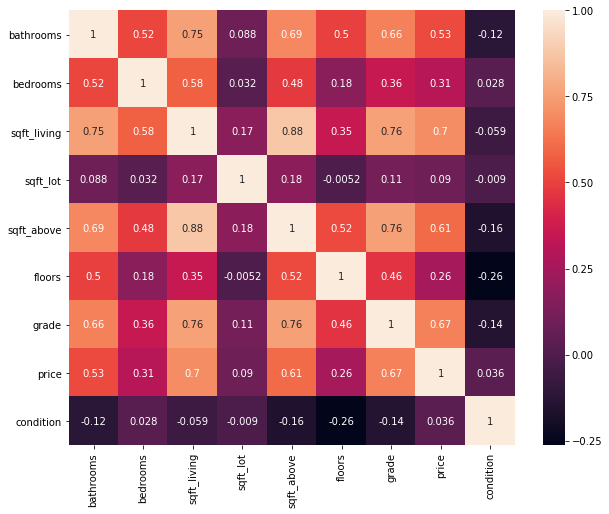

In [14]:
corr = housing[['bathrooms', 'bedrooms', 'sqft_living', 'sqft_lot','sqft_above', 'floors', 'grade', 'price','condition']]

plt.figure(figsize=(10,8))
sns.heatmap(corr.astype(float).corr(),vmax=1.0,  annot=True)
plt.show()
# sqft_above and sqft_living are the most correlated i.e there is correlation between both.

## ML

In [15]:
prices = housing['price']
features = housing.drop(['price','id','date','lat','long','zipcode'], axis = 1)

In [16]:
minimum_price = np.min(prices)
maximum_price = np.max(prices)
mean_price = np.mean(prices)
median_price = np.median(prices)
std_price = np.std(prices)
print("Statistics for Lagos housing dataset:\n")
print("Minimum price: ${:,.2f}".format(minimum_price))
print("Maximum price: ${:,.2f}".format(maximum_price))
print("Mean price: ${:,.2f}".format(mean_price))
print("Median price: ${:,.2f}".format(median_price))
print("Standard deviation of prices: ${:,.2f}".format(std_price))

Statistics for Lagos housing dataset:

Minimum price: $75,000.00
Maximum price: $7,700,000.00
Mean price: $540,088.14
Median price: $450,000.00
Standard deviation of prices: $367,118.70


In [17]:
y=prices

In [18]:
x=features

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

##  We will be using 3 different models to see which one works best.
1. LinearRegression
2. ExtraTreesRegressor
3. RandomForestRegressor

In [20]:
from sklearn.ensemble import ExtraTreesRegressor
c=ExtraTreesRegressor()
c.fit(x_train,y_train)
c.score(x_test,y_test)


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.7420378365774876

In [21]:
predictions = c.predict(x_test)
predictions

array([ 382400. ,  454800. ,  534709.8, ...,  450585. ,  301110. ,
       1084350. ])

In [22]:
x.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503


In [23]:
client_data = [[3, 1, 1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650], 
               [3, 2, 2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,5650], 
               [2, 1, 770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062],
              [4,3,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000]] 
for i, price in enumerate(c.predict(client_data)):
    print("Predicted selling price for Client {}'s home: #{:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: #221,900.00
Predicted selling price for Client 2's home: #577,525.00
Predicted selling price for Client 3's home: #180,000.00
Predicted selling price for Client 4's home: #473,250.00


In [24]:
prices.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [25]:
from sklearn import metrics 

In [26]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions)) 
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 120548.10925354718
MSE: 36185617153.33434
RMSE: 190225.17486740378


In [27]:
metrics.explained_variance_score(y_test, predictions)

0.7420751433058407